In [144]:
import requests
from bs4 import BeautifulSoup
import csv
import time
import random
import usaddress
import pandas as pd
import numpy as np
import re
import warnings
import spacy
from collections import Counter
from spacy.matcher import Matcher

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
warnings.filterwarnings('ignore')

In [4]:
# def fetch_and_save_robots_txt(url):
#     # Construct the URL for the robots.txt file
#     robots_url = f"{url}/robots.txt"

#     try:
#         # Send a GET request to fetch the robots.txt file
#         headers = {
#             "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
#         }
#         response = requests.get(robots_url, headers=headers)
        
#         # Check if the request was successful (status code 200)
#         if response.status_code == 200:
#             # Print the content of the robots.txt file (first 1000 characters)
#             print(response.text[:1000])
            
#             # Save the content to a file named 'robots.txt'
#             with open('robots.txt', 'w', encoding='utf-8') as f:
#                 f.write(response.text)
                
#             print("robots.txt saved successfully.")
#         else:
#             print(f"Failed to fetch robots.txt. Status code: {response.status_code}")
#     except requests.RequestException as e:
#         print(f"An error occurred: {e}")

# # Example usage:
# fetch_and_save_robots_txt("https://www.mfg.com/manufacturer-directory/?manufacturing_location=United+States&ep_filter_manufacturing_location=united-states&capability=CNC+Machining&ep_filter_capability=cnc-machining&search")


In [5]:
# url = "https://www.mfg.com/manufacturer/keystone-machine-inc-littlestown-pennsylvania-339275/"
# headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
# response = requests.get(url, headers=headers)
# soup = BeautifulSoup(response.content, 'html.parser')

# supplier_name_= soup.find('h1', class_="mb-0 text-center text-sm-left").text.strip()
# location_ = soup.find('a', class_="text-capitalize").text.strip()

# # Find the <h2> tag with text 'Materials'
# materials_tag = soup.find('h2', text='Materials')
# industry_tag = soup.find('h2', text='Industries')
# if materials_tag:
#     materials_list_ = materials_tag.find_next_sibling(text=True).strip()
# elif industry_tag:
#     materials_list_ = industry_tag.find_next_sibling(text=True).strip()

# info_ = soup.find('div', class_="mx-0 mt-2 row")
# info_ = info_.get_text().strip().replace('About\n', '')
# materials_list_

In [6]:
# Data frame downloaded from US postal site contaning all the zip codes (https://postalpro.usps.com/ZIP_Locale_Detail)
zip_df = pd.read_excel("C:\\Users\\Raghav\\Downloads\\simplemaps_uszips_basicv1.85\\ZIP_Locale_Detail.xlsx")

In [7]:
zip_df

,zip,state,city
0,601,PUERTO RICO,ADJUNTAS
1,602,PUERTO RICO,AGUADA
2,603,PUERTO RICO,AGUADILLA
3,604,PUERTO RICO,AGUADILLA
4,605,PUERTO RICO,AGUADILLA
...,...,...,...
44172,99925,ALASKA,KLAWOCK
44173,99926,ALASKA,METLAKATLA
44174,99927,ALASKA,POINT BAKER
44175,99928,ALASKA,WARD COVE


In [8]:
# def extract_city_state_usaddress(address, zip_df):
#     parsed_address = usaddress.parse(address)
#     city_ = None
#     state_ = None
#     for component in parsed_address:
#         if component[1] == 'ZipCode':
#             zip_code = component[0]
#             zip_code = re.sub(r'\D', '', zip_code)
#             zip_code = int(zip_code)
#             state_ = zip_df.loc[zip_df['zip'] == zip_code, 'state'].iloc[0]
#             city_ = zip_df.loc[zip_df['zip'] == zip_code, 'city'].iloc[0]
#             return city_, state_
#         elif component[1] == 'StateName':
#             state_ = component[0]
#         elif component[1] == 'PlaceName':
#             city_ = component[0]
#         if not city_:
#             city_ = 'None'
#         if not state_:
#             state_ = 'None'
#     return city_, state_

In [9]:
def get_city_state_from_address(address, zip_df):
    # Regular expression to match the zip code (5 digits)
    match = re.search(r'\b\d{5}\b(?=[^\d]*$)', address)
    if match:
        zip_code = int(match.group(0))  # Convert to integer
        print(zip_code)
        # Lookup the city and state from the DataFrame
        zip_row = zip_df.loc[zip_df['zip'] == zip_code]
        if not zip_row.empty:
            city_ = zip_row['city'].iloc[0]
            state_ = zip_row['state'].iloc[0]
            return city_, state_
        else:
            print(f"Zip code {zip_code} not found in the DataFrame.")
            return None, None
    else:
        print("No valid zip code found in the address.")
        return None, None

# Example usage
address = "46918 Liberty Dr, Michigan, 48393, United States"
city, state = get_city_state_from_address(address, zip_df)
print(f"City: {city}, State: {state}")

48393
City: WIXOM, State: MICHIGAN 1


In [10]:
# def extract_city_state_usaddress(address, zip_df):
#     parsed_address = usaddress.parse(address)
#     city_ = None
#     state_ = None
#     for component in parsed_address:
#         if component[1] == 'ZipCode':
#             zip_code = component[0]
#             zip_code = re.sub(r'\D', '', zip_code)
#             zip_code = int(zip_code)
#             state_ = zip_df.loc[zip_df['zip'] == zip_code, 'state'].iloc[0]
#             city_ = zip_df.loc[zip_df['zip'] == zip_code, 'city'].iloc[0]
#             return city_, state_
#         elif component[1] == 'StateName':
#             state_ = component[0]
#         elif component[1] == 'PlaceName':
#             city_ = component[0]

# address = "6575 Labeaux Ave NE, Minnesota, 55301, United"
# extract_city_state_usaddress(address, zip_df)

In [11]:
def page_scarape(url):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Initialize variables to None in case they are not found
    supplier_name_ = None
    location_ = None
    materials_list_ = None
    info_ = None
    
    # Attempt to find elements and extract text
    supplier_name_tag = soup.find('h1', class_="mb-0 text-center text-sm-left")
    if supplier_name_tag:
        supplier_name_ = supplier_name_tag.text.strip()
    
    location_tag = soup.find('a', class_="text-capitalize")
    if location_tag:
        location_ = location_tag.text.strip()
    
    materials_tag = soup.find('h2', text='Materials')
    industry_tag = soup.find('h2', text='Industries')
    if materials_tag:
        materials_list_ = materials_tag.find_next_sibling(text=True).strip()
    elif industry_tag:
        materials_list_ = industry_tag.find_next_sibling(text=True).strip()
    else:
        materials_list_ = 'Material Not found'
    
    info_tag = soup.find('div', class_="mx-0 mt-2 row")
    if info_tag:
        info_ = info_tag.get_text().strip().replace('About\n', '')
    
    data_dict = {
        'supplier_name_': supplier_name_ if supplier_name_ else 'Supplier Name Not found',
        'location_': location_ if location_ else 'Location Not found',
        'materials_list_': materials_list_,
        'info_': info_ if info_ else 'Information Not found',
        'link_': url
    }
    return data_dict

In [12]:
# def page_scarape(url):
#     headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
#     response = requests.get(url, headers=headers)
#     soup = BeautifulSoup(response.content, 'html.parser')
    
#     supplier_name_= soup.find('h1', class_="mb-0 text-center text-sm-left").text.strip()
#     location_ = soup.find('a', class_="text-capitalize").text.strip()
    
#     # Find the <h2> tag with text 'Materials'/'industry'
#     materials_tag = soup.find('h2', text='Materials')
#     industry_tag = soup.find('h2', text='Industries')
#     if materials_tag:
#         materials_list_ = materials_tag.find_next_sibling(text=True).strip()
#     elif industry_tag:
#         materials_list_ = industry_tag.find_next_sibling(text=True).strip()
#     else:
#         materials_list_ = 'Material Not found'
    
#     info_ = soup.find('div', class_="mx-0 mt-2 row")
#     info_ = info_.get_text().strip().replace('About\n', '')

#     dict = {
#         'supplier_name_':supplier_name_,
#         'location_':location_,
#         'materials_list_':materials_list_,
#         'info_':info_,
#         'link_':url
#     }
    
#     return dict

In [13]:
url = "https://www.mfg.com/manufacturer-directory/?manufacturing_location=United+States&ep_filter_manufacturing_location=united-states&capability=CNC+Machining&ep_filter_capability=cnc-machining&search"
page_scarape(url)

{'supplier_name_': 'Supplier Name Not found',
 'location_': 'Location Not found',
 'materials_list_': '',
 'info_': 'For over 50 years, we have delivered outstanding service to a range of industries requiring precision machined parts and flawless execution. Our investment in cutting-edge CNC machining centers and CNC lathes ensures we can meet your project’s technical requirements and your expectations. With state-of-the-art computerized turning and machining centers, plus uncompromising ISO 9001-2015 Quality Control processes, A-1 Precision delivers customer satisfaction.\n\n\nView More Details\n Compare',
 'link_': 'https://www.mfg.com/manufacturer-directory/?manufacturing_location=United+States&ep_filter_manufacturing_location=united-states&capability=CNC+Machining&ep_filter_capability=cnc-machining&search'}

In [14]:
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
response = requests.get(url, headers=headers)
print(response)

<Response [200]>


In [25]:
columns = ['supplier_name_', 'location_','materials_list_', 'info_','link_']
df = pd.DataFrame(columns=columns)

# Create a BeautifulSoup object
soup = BeautifulSoup(response.content, 'html.parser')

# Find the first <a> tag with the specific class
supplier = soup.find('a', class_="align-text-bottom")

# Loop to find all subsequent <a> tags with the same class
while supplier:
    # Extract the href attribute
    href = supplier['href']
    href=str(href)
    website = 'https://www.mfg.com'+href+'/'
    print(website)
    data_dict  = page_scarape(website)
    df = df.append(data_dict , ignore_index=True)
    
    # Find the next <a> tag with the same class
    supplier = supplier.find_next('a', class_="align-text-bottom")

    # Introduce a random delay between 1 to 3 seconds
    time.sleep(random.uniform(1, 3))

df.head()

https://www.mfg.com/manufacturer/a1-precision-inc-vancouver-washington-833060/
https://www.mfg.com/manufacturer/spargo-machine-products-terryville-connecticut-795651/
https://www.mfg.com/manufacturer/keystone-machine-inc-littlestown-pennsylvania-339275/
https://www.mfg.com/manufacturer/d-d-precision-machine-co-inc-middleboro-massachusetts-337958/
https://www.mfg.com/manufacturer/hilltop-technology-laboratory-irvine-california-1773677/
https://www.mfg.com/manufacturer/tr-manufacturing-garrett-indiana-337975/
https://www.mfg.com/manufacturer/wh-bagshaw-co-inc-new-hampshire-338293/
https://www.mfg.com/manufacturer/northrop-sales-inc-ponte-vedra-florida-337512/
https://www.mfg.com/manufacturer/mckenzie-cnc-inc-estacada-oregon-627550/
https://www.mfg.com/manufacturer/4th-axis-machine-and-design-inc-minnesota-703692/
https://www.mfg.com/manufacturer/west-michigan-tube-wire-forming-muskegon-michigan-363671/
https://www.mfg.com/manufacturer/machinepro-technologies-celina-ohio-338388/
https://w

,supplier_name_,location_,materials_list_,info_,link_
0,"A-1 Precision, Inc.","8014 NE 19th Court, Vancouver, Washington, 986...","Aluminum, Carbon Steel, Tool Steel, Bronze, St...","For over 50 years, we have delivered outstandi...",https://www.mfg.com/manufacturer/a1-precision-...
1,Spargo Machine Products,"6 Gear Drive, Terryville, Connecticut, 06786, ...","Aluminum, Bronze, Other/Misc",Spargo Machine Products is dedicated to provid...,https://www.mfg.com/manufacturer/spargo-machin...
2,"Keystone Machine, Inc.","115 Newark Street, Littlestown, Pennsylvania, ...","Electronics and Semiconductor, Medical",Keystone Machine Inc. is a precision machining...,https://www.mfg.com/manufacturer/keystone-mach...
3,"D & D Precision Machine Co., Inc.","395 Plymouth Street, Middleboro, Massachusetts...",Material Not found,About our Precision Machine Shop\r\n\r\nD&D Pr...,https://www.mfg.com/manufacturer/d-d-precision...
4,Hilltop Technology Laboratory,"51 Parker, Irvine, California, 92618, United S...","Aluminum, ABS-Like, PC-Like, Nylon or Nylon-Li...","Hilltop Technology Laboratory, Inc. specialize...",https://www.mfg.com/manufacturer/hilltop-techn...


In [26]:
df

,supplier_name_,location_,materials_list_,info_,link_
0,"A-1 Precision, Inc.","8014 NE 19th Court, Vancouver, Washington, 986...","Aluminum, Carbon Steel, Tool Steel, Bronze, St...","For over 50 years, we have delivered outstandi...",https://www.mfg.com/manufacturer/a1-precision-...
1,Spargo Machine Products,"6 Gear Drive, Terryville, Connecticut, 06786, ...","Aluminum, Bronze, Other/Misc",Spargo Machine Products is dedicated to provid...,https://www.mfg.com/manufacturer/spargo-machin...
2,"Keystone Machine, Inc.","115 Newark Street, Littlestown, Pennsylvania, ...","Electronics and Semiconductor, Medical",Keystone Machine Inc. is a precision machining...,https://www.mfg.com/manufacturer/keystone-mach...
3,"D & D Precision Machine Co., Inc.","395 Plymouth Street, Middleboro, Massachusetts...",Material Not found,About our Precision Machine Shop\r\n\r\nD&D Pr...,https://www.mfg.com/manufacturer/d-d-precision...
4,Hilltop Technology Laboratory,"51 Parker, Irvine, California, 92618, United S...","Aluminum, ABS-Like, PC-Like, Nylon or Nylon-Li...","Hilltop Technology Laboratory, Inc. specialize...",https://www.mfg.com/manufacturer/hilltop-techn...
5,TR Manufacturing,"1106 S. Cowen St, Garrett, Indiana, 46738, Uni...","Aluminum, Carbon Steel, Tool Steel, Bronze, Ni...","Located just north of Fort Wayne in Garrett, I...",https://www.mfg.com/manufacturer/tr-manufactur...
6,WH Bagshaw Co Inc,"1 Pine St. EXT, New Hampshire, 03061, United S...",Material Not found,With the same entrepreneurial spirit of our fo...,https://www.mfg.com/manufacturer/wh-bagshaw-co...
7,"NORTHROP SALES, INC","P.O. Box 2907, Ponte Vedra, Florida, 32004, Un...",Material Not found,NORTHROP SALES has both domestic and global ma...,https://www.mfg.com/manufacturer/northrop-sale...
8,"McKenzie CNC, Inc.","2254 NW Campus DR, Estacada, Oregon, 97023, Un...",Material Not found,Machines:\n\n2018 - DMG Mori NHX 4000 - 4 Axis...,https://www.mfg.com/manufacturer/mckenzie-cnc-...
9,"4th Axis Machine and Design, Inc.","6575 Labeaux Ave NE, Minnesota, 55301, United ...",Material Not found,4th Axis Machine and Design Inc. has a long ba...,https://www.mfg.com/manufacturer/4th-axis-mach...


In [27]:
df[['city_', 'state_']] = df['location_'].apply(lambda x: pd.Series(get_city_state_from_address(x, zip_df)))
df

98665
6786
17340
2346
92618
46738
3061
32004
97023
55301
49444
45822
2359
48393
29418
44077
No valid zip code found in the address.
48170
49068
No valid zip code found in the address.
48310
49428
55335
51247
49631


,supplier_name_,location_,materials_list_,info_,link_,city_,state_
0,"A-1 Precision, Inc.","8014 NE 19th Court, Vancouver, Washington, 986...","Aluminum, Carbon Steel, Tool Steel, Bronze, St...","For over 50 years, we have delivered outstandi...",https://www.mfg.com/manufacturer/a1-precision-...,VANCOUVER,WASHINGTON
1,Spargo Machine Products,"6 Gear Drive, Terryville, Connecticut, 06786, ...","Aluminum, Bronze, Other/Misc",Spargo Machine Products is dedicated to provid...,https://www.mfg.com/manufacturer/spargo-machin...,TERRYVILLE,CONNECTICUT
2,"Keystone Machine, Inc.","115 Newark Street, Littlestown, Pennsylvania, ...","Electronics and Semiconductor, Medical",Keystone Machine Inc. is a precision machining...,https://www.mfg.com/manufacturer/keystone-mach...,LITTLESTOWN,PENNSYLVANIA 1
3,"D & D Precision Machine Co., Inc.","395 Plymouth Street, Middleboro, Massachusetts...",Material Not found,About our Precision Machine Shop\r\n\r\nD&D Pr...,https://www.mfg.com/manufacturer/d-d-precision...,LAKEVILLE,MA-RI
4,Hilltop Technology Laboratory,"51 Parker, Irvine, California, 92618, United S...","Aluminum, ABS-Like, PC-Like, Nylon or Nylon-Li...","Hilltop Technology Laboratory, Inc. specialize...",https://www.mfg.com/manufacturer/hilltop-techn...,IRVINE,CALIFORNIA 4
5,TR Manufacturing,"1106 S. Cowen St, Garrett, Indiana, 46738, Uni...","Aluminum, Carbon Steel, Tool Steel, Bronze, Ni...","Located just north of Fort Wayne in Garrett, I...",https://www.mfg.com/manufacturer/tr-manufactur...,GARRETT,INDIANA
6,WH Bagshaw Co Inc,"1 Pine St. EXT, New Hampshire, 03061, United S...",Material Not found,With the same entrepreneurial spirit of our fo...,https://www.mfg.com/manufacturer/wh-bagshaw-co...,NASHUA,ME-NH-VT
7,"NORTHROP SALES, INC","P.O. Box 2907, Ponte Vedra, Florida, 32004, Un...",Material Not found,NORTHROP SALES has both domestic and global ma...,https://www.mfg.com/manufacturer/northrop-sale...,PONTE VEDRA BEACH,FLORIDA 1
8,"McKenzie CNC, Inc.","2254 NW Campus DR, Estacada, Oregon, 97023, Un...",Material Not found,Machines:\n\n2018 - DMG Mori NHX 4000 - 4 Axis...,https://www.mfg.com/manufacturer/mckenzie-cnc-...,ESTACADA,ID-MT-OR
9,"4th Axis Machine and Design, Inc.","6575 Labeaux Ave NE, Minnesota, 55301, United ...",Material Not found,4th Axis Machine and Design Inc. has a long ba...,https://www.mfg.com/manufacturer/4th-axis-mach...,ALBERTVILLE,MN-ND


In [186]:
columns = ['supplier_name_', 'location_','materials_list_', 'info_','link_']
df_01 = pd.DataFrame(columns=columns)

# URL pattern for the manufacturer directory
base_url = "https://www.mfg.com/manufacturer-directory/page/{page}/?manufacturing_location=United+States&ep_filter_manufacturing_location=united-states&capability=CNC+Machining&ep_filter_capability=cnc-machining&search"

# Number of pages to scrape
start_page = 1
end_page = 305

for page_num in range(start_page, end_page + 1):
    # Construct the URL for the current page
    url = base_url.format(page=page_num)

    print(url)
    # Send a GET request to the URL
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
    response = requests.get(url, headers=headers)
    print(response)
    
    # Check if the request was successful
    if response.status_code == 200:
        print(f"Scraping page {page_num}...")
        
        # Create a BeautifulSoup object
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the first <a> tag with the specific class
        supplier = soup.find('a', class_="align-text-bottom")
        
        # Loop to find all subsequent <a> tags with the same class
        while supplier:
            # Extract the href attribute
            href = supplier['href']
            href=str(href)
            website = 'https://www.mfg.com'+href+'/'
            print(website)
            data_dict  = page_scarape(website)
            df_01 = df_01.append(data_dict , ignore_index=True)
            
            # Find the next <a> tag with the same class
            supplier = supplier.find_next('a', class_="align-text-bottom")
        
            # Introduce a random delay between 1 to 3 seconds
            time.sleep(random.uniform(1, 3))
            
    else:
        print(f"Failed to retrieve page {page_num}. Status code: {response.status_code}")

print("Scraping complete.")
df_01.head()

https://www.mfg.com/manufacturer-directory/page/1/?manufacturing_location=United+States&ep_filter_manufacturing_location=united-states&capability=CNC+Machining&ep_filter_capability=cnc-machining&search
<Response [200]>
Scraping page 1...
https://www.mfg.com/manufacturer/a1-precision-inc-vancouver-washington-833060/
https://www.mfg.com/manufacturer/spargo-machine-products-terryville-connecticut-795651/
https://www.mfg.com/manufacturer/keystone-machine-inc-littlestown-pennsylvania-339275/
https://www.mfg.com/manufacturer/d-d-precision-machine-co-inc-middleboro-massachusetts-337958/
https://www.mfg.com/manufacturer/hilltop-technology-laboratory-irvine-california-1773677/
https://www.mfg.com/manufacturer/tr-manufacturing-garrett-indiana-337975/
https://www.mfg.com/manufacturer/wh-bagshaw-co-inc-new-hampshire-338293/
https://www.mfg.com/manufacturer/northrop-sales-inc-ponte-vedra-florida-337512/
https://www.mfg.com/manufacturer/mckenzie-cnc-inc-estacada-oregon-627550/
https://www.mfg.com/ma

AttributeError: 'NoneType' object has no attribute 'strip'

In [187]:
df_01

,supplier_name_,location_,materials_list_,info_,link_
0,"A-1 Precision, Inc.","8014 NE 19th Court, Vancouver, Washington, 986...","Aluminum, Carbon Steel, Tool Steel, Bronze, St...","For over 50 years, we have delivered outstandi...",https://www.mfg.com/manufacturer/a1-precision-...
1,Spargo Machine Products,"6 Gear Drive, Terryville, Connecticut, 06786, ...","Aluminum, Bronze, Other/Misc",Spargo Machine Products is dedicated to provid...,https://www.mfg.com/manufacturer/spargo-machin...
2,"Keystone Machine, Inc.","115 Newark Street, Littlestown, Pennsylvania, ...","Electronics and Semiconductor, Medical",Keystone Machine Inc. is a precision machining...,https://www.mfg.com/manufacturer/keystone-mach...
3,"D & D Precision Machine Co., Inc.","395 Plymouth Street, Middleboro, Massachusetts...",Material Not found,About our Precision Machine Shop\r\n\r\nD&D Pr...,https://www.mfg.com/manufacturer/d-d-precision...
4,Hilltop Technology Laboratory,"51 Parker, Irvine, California, 92618, United S...","Aluminum, ABS-Like, PC-Like, Nylon or Nylon-Li...","Hilltop Technology Laboratory, Inc. specialize...",https://www.mfg.com/manufacturer/hilltop-techn...
...,...,...,...,...,...
310,Marinette Machine LLC,"3210 Hall Ave, Ste A, Wisconsin, 54143, United...","Aluminum, Carbon Steel, Tool Steel, Bronze, St...",Marinette Machine is a prototype machine shop ...,https://www.mfg.com/manufacturer/marinette-mac...
311,Advanced Prototyping Solutions LLC,"6517 Governor Printz Blvd, Wilmington, Delawar...","Aluminum, Carbon Steel, Tool Steel, Bronze, Th...",Advanced Prototyping Solutions is an American ...,https://www.mfg.com/manufacturer/advanced-prot...
312,B&C Machining,"3570 Sardis Hwy., Timmonsville, South Carolina...",Material Not found,B&C Machining is a Swiss screw machine shop pr...,https://www.mfg.com/manufacturer/bc-machining-...
313,Precision Swiss Products,"1911 Tarob Court, California, 95035, United St...","Aluminum, Carbon Steel, Tool Steel, Bronze, Th...","PSP is a highly automated ISO 9001, 13485 and ...",https://www.mfg.com/manufacturer/precision-swi...


In [188]:
df_01[['city_', 'state_']] = df_01['location_'].apply(lambda x: pd.Series(get_city_state_from_address(x, zip_df)))
df_01

98665
6786
17340
2346
92618
46738
3061
32004
97023
55301
49444
45822
2359
48393
29418
44077
No valid zip code found in the address.
48170
49068
No valid zip code found in the address.
48310
49428
55335
51247
49631
46809
57064
44035
64030
91730
29054
67110
53151
85204
95136
73448
78641
1843
90201
47904
44094
29045
28114
53088
91745
94954
92131
44094
32779
85706
49348
32669
2035
54482
No valid zip code found in the address.
34601
91320
60002
72015
45503
42301
18976
3813
85212
53158
49348
60639
14701
34994
53548
92126
24201
28202
6098
80537
92020
95112
54216
54956
17268
95112
79936
No valid zip code found in the address.
54751
7762
14219
54217
47905
No valid zip code found in the address.
48642
11201
64030
49509
2885
32757
14788
44253
No valid zip code found in the address.
15902
70648
1970
61739
No valid zip code found in the address.
60101
No valid zip code found in the address.
No valid zip code found in the address.
No valid zip code found in the address.
75009
No valid zip code found

,supplier_name_,location_,materials_list_,info_,link_,city_,state_
0,"A-1 Precision, Inc.","8014 NE 19th Court, Vancouver, Washington, 986...","Aluminum, Carbon Steel, Tool Steel, Bronze, St...","For over 50 years, we have delivered outstandi...",https://www.mfg.com/manufacturer/a1-precision-...,VANCOUVER,WASHINGTON
1,Spargo Machine Products,"6 Gear Drive, Terryville, Connecticut, 06786, ...","Aluminum, Bronze, Other/Misc",Spargo Machine Products is dedicated to provid...,https://www.mfg.com/manufacturer/spargo-machin...,TERRYVILLE,CONNECTICUT
2,"Keystone Machine, Inc.","115 Newark Street, Littlestown, Pennsylvania, ...","Electronics and Semiconductor, Medical",Keystone Machine Inc. is a precision machining...,https://www.mfg.com/manufacturer/keystone-mach...,LITTLESTOWN,PENNSYLVANIA 1
3,"D & D Precision Machine Co., Inc.","395 Plymouth Street, Middleboro, Massachusetts...",Material Not found,About our Precision Machine Shop\r\n\r\nD&D Pr...,https://www.mfg.com/manufacturer/d-d-precision...,LAKEVILLE,MA-RI
4,Hilltop Technology Laboratory,"51 Parker, Irvine, California, 92618, United S...","Aluminum, ABS-Like, PC-Like, Nylon or Nylon-Li...","Hilltop Technology Laboratory, Inc. specialize...",https://www.mfg.com/manufacturer/hilltop-techn...,IRVINE,CALIFORNIA 4
...,...,...,...,...,...,...,...
310,Marinette Machine LLC,"3210 Hall Ave, Ste A, Wisconsin, 54143, United...","Aluminum, Carbon Steel, Tool Steel, Bronze, St...",Marinette Machine is a prototype machine shop ...,https://www.mfg.com/manufacturer/marinette-mac...,MARINETTE,WISCONSIN
311,Advanced Prototyping Solutions LLC,"6517 Governor Printz Blvd, Wilmington, Delawar...","Aluminum, Carbon Steel, Tool Steel, Bronze, Th...",Advanced Prototyping Solutions is an American ...,https://www.mfg.com/manufacturer/advanced-prot...,WILMINGTON,DE-PA 2
312,B&C Machining,"3570 Sardis Hwy., Timmonsville, South Carolina...",Material Not found,B&C Machining is a Swiss screw machine shop pr...,https://www.mfg.com/manufacturer/bc-machining-...,TIMMONSVILLE,SOUTH CAROLINA
313,Precision Swiss Products,"1911 Tarob Court, California, 95035, United St...","Aluminum, Carbon Steel, Tool Steel, Bronze, Th...","PSP is a highly automated ISO 9001, 13485 and ...",https://www.mfg.com/manufacturer/precision-swi...,MILPITAS,CALIFORNIA 1


In [191]:
file_path = 'C:\\Users\\Raghav\\Downloads\\simplemaps_uszips_basicv1.85\\cnc_data.xlsx'
df_01.to_excel(file_path, index=False)

In [145]:
df_02 = pd.read_excel('C:\\Users\\Raghav\\Downloads\\simplemaps_uszips_basicv1.85\\cnc_data.xlsx')
df_02

,supplier_name_,location_,materials_list_,info_,link_,city_,state_
0,"A-1 Precision, Inc.","8014 NE 19th Court, Vancouver, Washington, 986...","Aluminum, Carbon Steel, Tool Steel, Bronze, St...","For over 50 years, we have delivered outstandi...",https://www.mfg.com/manufacturer/a1-precision-...,VANCOUVER,WASHINGTON
1,Spargo Machine Products,"6 Gear Drive, Terryville, Connecticut, 06786, ...","Aluminum, Bronze, Other/Misc",Spargo Machine Products is dedicated to provid...,https://www.mfg.com/manufacturer/spargo-machin...,TERRYVILLE,CONNECTICUT
2,"Keystone Machine, Inc.","115 Newark Street, Littlestown, Pennsylvania, ...","Electronics and Semiconductor, Medical",Keystone Machine Inc. is a precision machining...,https://www.mfg.com/manufacturer/keystone-mach...,LITTLESTOWN,PENNSYLVANIA 1
3,"D & D Precision Machine Co., Inc.","395 Plymouth Street, Middleboro, Massachusetts...",Material Not found,About our Precision Machine Shop\r\n\r\nD&D Pr...,https://www.mfg.com/manufacturer/d-d-precision...,LAKEVILLE,MA-RI
4,Hilltop Technology Laboratory,"51 Parker, Irvine, California, 92618, United S...","Aluminum, ABS-Like, PC-Like, Nylon or Nylon-Li...","Hilltop Technology Laboratory, Inc. specialize...",https://www.mfg.com/manufacturer/hilltop-techn...,IRVINE,CALIFORNIA 4
...,...,...,...,...,...,...,...
310,Marinette Machine LLC,"3210 Hall Ave, Ste A, Wisconsin, 54143, United...","Aluminum, Carbon Steel, Tool Steel, Bronze, St...",Marinette Machine is a prototype machine shop ...,https://www.mfg.com/manufacturer/marinette-mac...,MARINETTE,WISCONSIN
311,Advanced Prototyping Solutions LLC,"6517 Governor Printz Blvd, Wilmington, Delawar...","Aluminum, Carbon Steel, Tool Steel, Bronze, Th...",Advanced Prototyping Solutions is an American ...,https://www.mfg.com/manufacturer/advanced-prot...,WILMINGTON,DE-PA 2
312,B&C Machining,"3570 Sardis Hwy., Timmonsville, South Carolina...",Material Not found,B&C Machining is a Swiss screw machine shop pr...,https://www.mfg.com/manufacturer/bc-machining-...,TIMMONSVILLE,SOUTH CAROLINA
313,Precision Swiss Products,"1911 Tarob Court, California, 95035, United St...","Aluminum, Carbon Steel, Tool Steel, Bronze, Th...","PSP is a highly automated ISO 9001, 13485 and ...",https://www.mfg.com/manufacturer/precision-swi...,MILPITAS,CALIFORNIA 1


In [146]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Define patterns for the matcher
def create_patterns():
    material_patterns = [
        [{"LOWER": {"IN": ["aluminum", "steel", "titanium", "plastic", "silicon", "ss", "metals"]}}]
    ]
    size_patterns = [
        [{"TEXT": {"REGEX": r"\b\d+(\.\d+)?\s*(cm|mm|m|inches|inch|feet|ft)\b"}}]
    ]
    industry_patterns = [
        [{"LOWER": {"IN": ["aerospace", "environmental", "food", "government", "sub-contractors", "high", "tech", "medical", "military", "pharmaceutical", "semi-conductors"]}}]
    ]
    return material_patterns, size_patterns, industry_patterns

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Create and add the patterns to the matcher
material_patterns, size_patterns, industry_patterns = create_patterns()
matcher.add("MATERIAL", material_patterns)
matcher.add("SIZE", size_patterns)
matcher.add("INDUSTRY", industry_patterns)

def extract_information(text):
    doc = nlp(text)
    matches = matcher(doc)
    
    materials = []
    sizes = []
    industries = []
    
    for match_id, start, end in matches:
        span = doc[start:end]
        label = nlp.vocab.strings[match_id]
        if label == "MATERIAL":
            materials.append(span.text)
        elif label == "SIZE":
            sizes.append(span.text)
        elif label == "INDUSTRY":
            industries.append(span.text)
    
    return {
        "materials": ', '.join(set(materials)),
        "sizes": ', '.join(set(sizes)),
        "industries": ', '.join(set(industries)),
        "other_info": text  # You can further process other info if needed
    }

# Apply the extraction function to each row in the DataFrame
df_extracted = df_02['info_'].apply(extract_information)
df_extracted = pd.DataFrame(df_extracted.tolist())

# Concatenate the original DataFrame with the extracted information
df_final = pd.concat([df_02, df_extracted], axis=1)

# Display the final DataFrame
df_final

,supplier_name_,location_,materials_list_,info_,link_,city_,state_,materials,sizes,industries,other_info
0,"A-1 Precision, Inc.","8014 NE 19th Court, Vancouver, Washington, 986...","Aluminum, Carbon Steel, Tool Steel, Bronze, St...","For over 50 years, we have delivered outstandi...",https://www.mfg.com/manufacturer/a1-precision-...,VANCOUVER,WASHINGTON,,,,"For over 50 years, we have delivered outstandi..."
1,Spargo Machine Products,"6 Gear Drive, Terryville, Connecticut, 06786, ...","Aluminum, Bronze, Other/Misc",Spargo Machine Products is dedicated to provid...,https://www.mfg.com/manufacturer/spargo-machin...,TERRYVILLE,CONNECTICUT,"aluminum, steel",,,Spargo Machine Products is dedicated to provid...
2,"Keystone Machine, Inc.","115 Newark Street, Littlestown, Pennsylvania, ...","Electronics and Semiconductor, Medical",Keystone Machine Inc. is a precision machining...,https://www.mfg.com/manufacturer/keystone-mach...,LITTLESTOWN,PENNSYLVANIA 1,,,,Keystone Machine Inc. is a precision machining...
3,"D & D Precision Machine Co., Inc.","395 Plymouth Street, Middleboro, Massachusetts...",Material Not found,About our Precision Machine Shop\r\n\r\nD&D Pr...,https://www.mfg.com/manufacturer/d-d-precision...,LAKEVILLE,MA-RI,,,,About our Precision Machine Shop\r\n\r\nD&D Pr...
4,Hilltop Technology Laboratory,"51 Parker, Irvine, California, 92618, United S...","Aluminum, ABS-Like, PC-Like, Nylon or Nylon-Li...","Hilltop Technology Laboratory, Inc. specialize...",https://www.mfg.com/manufacturer/hilltop-techn...,IRVINE,CALIFORNIA 4,,,,"Hilltop Technology Laboratory, Inc. specialize..."
...,...,...,...,...,...,...,...,...,...,...,...
310,Marinette Machine LLC,"3210 Hall Ave, Ste A, Wisconsin, 54143, United...","Aluminum, Carbon Steel, Tool Steel, Bronze, St...",Marinette Machine is a prototype machine shop ...,https://www.mfg.com/manufacturer/marinette-mac...,MARINETTE,WISCONSIN,,,,Marinette Machine is a prototype machine shop ...
311,Advanced Prototyping Solutions LLC,"6517 Governor Printz Blvd, Wilmington, Delawar...","Aluminum, Carbon Steel, Tool Steel, Bronze, Th...",Advanced Prototyping Solutions is an American ...,https://www.mfg.com/manufacturer/advanced-prot...,WILMINGTON,DE-PA 2,,,,Advanced Prototyping Solutions is an American ...
312,B&C Machining,"3570 Sardis Hwy., Timmonsville, South Carolina...",Material Not found,B&C Machining is a Swiss screw machine shop pr...,https://www.mfg.com/manufacturer/bc-machining-...,TIMMONSVILLE,SOUTH CAROLINA,,,high,B&C Machining is a Swiss screw machine shop pr...
313,Precision Swiss Products,"1911 Tarob Court, California, 95035, United St...","Aluminum, Carbon Steel, Tool Steel, Bronze, Th...","PSP is a highly automated ISO 9001, 13485 and ...",https://www.mfg.com/manufacturer/precision-swi...,MILPITAS,CALIFORNIA 1,,,"aerospace, medical","PSP is a highly automated ISO 9001, 13485 and ..."


In [147]:
# Corrected syntax to update 'material_' where it is 'Material Not found'
df_final.loc[df_final['materials_list_'] == 'Material Not found', 'materials_list_'] = df_final['materials']

df_final['materials_list_'] = df_final['materials_list_'].fillna('Metals')

# Replace commas in all string columns
df_final = df_final.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)

df_final = df_final.drop(['info_','other_info','sizes','materials'], errors='ignore', axis=1)

df_final = df_final[['supplier_name_', 'city_','state_','materials_list_','industries', 'location_','link_']]

df_final = df_final[df_final['supplier_name_'] != 'Supplier Name Not found']
df_final.reset_index(inplace=True)

df_final['materials_list_'] = df_final['materials_list_'].replace(['', ' '], 'metals')
df_final = df_final.drop(['index'], errors='ignore', axis=1)

df_final[['supplier_name_', 'city_','state_','materials_list_','industries','location_']] = df_final[['supplier_name_', 'city_','state_','materials_list_','industries','location_']].apply(lambda x: x.str.lower())

df_final[['state_', 'city_']] = df_final[['state_', 'city_']].apply(lambda x: x.replace([np.nan, None, 'None','none'], 'foreign'))
df_final

,supplier_name_,city_,state_,materials_list_,industries,location_,link_
0,a-1 precision inc.,vancouver,washington,aluminum carbon steel tool steel bronze stainl...,,8014 ne 19th court vancouver washington 98665 ...,https://www.mfg.com/manufacturer/a1-precision-...
1,spargo machine products,terryville,connecticut,aluminum bronze other/misc,,6 gear drive terryville connecticut 06786 unit...,https://www.mfg.com/manufacturer/spargo-machin...
2,keystone machine inc.,littlestown,pennsylvania 1,electronics and semiconductor medical,,115 newark street littlestown pennsylvania 173...,https://www.mfg.com/manufacturer/keystone-mach...
3,d & d precision machine co. inc.,lakeville,ma-ri,metals,,395 plymouth street middleboro massachusetts 0...,https://www.mfg.com/manufacturer/d-d-precision...
4,hilltop technology laboratory,irvine,california 4,aluminum abs-like pc-like nylon or nylon-like ...,,51 parker irvine california 92618 united states,https://www.mfg.com/manufacturer/hilltop-techn...
...,...,...,...,...,...,...,...
293,marinette machine llc,marinette,wisconsin,aluminum carbon steel tool steel bronze stainl...,,3210 hall ave ste a wisconsin 54143 united states,https://www.mfg.com/manufacturer/marinette-mac...
294,advanced prototyping solutions llc,wilmington,de-pa 2,aluminum carbon steel tool steel bronze thermo...,,6517 governor printz blvd wilmington delaware ...,https://www.mfg.com/manufacturer/advanced-prot...
295,b&c machining,timmonsville,south carolina,metals,high,3570 sardis hwy. timmonsville south carolina 2...,https://www.mfg.com/manufacturer/bc-machining-...
296,precision swiss products,milpitas,california 1,aluminum carbon steel tool steel bronze thermo...,aerospace medical,1911 tarob court california 95035 united states,https://www.mfg.com/manufacturer/precision-swi...


In [ ]:
# save here as csv, json

In [150]:
# file_path = 'C:\\Users\\Raghav\\Downloads\\simplemaps_uszips_basicv1.85\\cnc_data_01.xlsx'
# df_final.to_excel(file_path, index=False)

In [235]:
df_03 = pd.read_excel('C:\\Users\\Raghav\\Downloads\\simplemaps_uszips_basicv1.85\\cnc_data_01.xlsx')
df_03

,supplier_name_,city_,state_,materials_list_,industries,complexity,price,location_,link_
0,a-1 precision inc.,vancouver,washington,aluminum carbon steel tool steel bronze stainl...,NaN,3,9,8014 ne 19th court vancouver washington 98665 ...,https://www.mfg.com/manufacturer/a1-precision-...
1,spargo machine products,terryville,connecticut,aluminum bronze other/misc,NaN,4,4,6 gear drive terryville connecticut 06786 unit...,https://www.mfg.com/manufacturer/spargo-machin...
2,keystone machine inc.,littlestown,pennsylvania 1,electronics and semiconductor medical,NaN,5,4,115 newark street littlestown pennsylvania 173...,https://www.mfg.com/manufacturer/keystone-mach...
3,d & d precision machine co. inc.,lakeville,ma-ri,metals,NaN,2,2,395 plymouth street middleboro massachusetts 0...,https://www.mfg.com/manufacturer/d-d-precision...
4,hilltop technology laboratory,irvine,california 4,aluminum abs-like pc-like nylon or nylon-like ...,NaN,3,4,51 parker irvine california 92618 united states,https://www.mfg.com/manufacturer/hilltop-techn...
...,...,...,...,...,...,...,...,...,...
293,marinette machine llc,marinette,wisconsin,aluminum carbon steel tool steel bronze stainl...,NaN,2,3,3210 hall ave ste a wisconsin 54143 united states,https://www.mfg.com/manufacturer/marinette-mac...
294,advanced prototyping solutions llc,wilmington,de-pa 2,aluminum carbon steel tool steel bronze thermo...,NaN,2,5,6517 governor printz blvd wilmington delaware ...,https://www.mfg.com/manufacturer/advanced-prot...
295,b&c machining,timmonsville,south carolina,metals,high,1,2,3570 sardis hwy. timmonsville south carolina 2...,https://www.mfg.com/manufacturer/bc-machining-...
296,precision swiss products,milpitas,california 1,aluminum carbon steel tool steel bronze thermo...,aerospace medical,3,7,1911 tarob court california 95035 united states,https://www.mfg.com/manufacturer/precision-swi...


In [236]:
# def fill_price(row):
#     if pd.isna(row['price']):
#         complexity = row['complexity']
#         # Generate random price based on complexity
#         possible_prices = [complexity * 2, (complexity * 2) - 1, (complexity * 2) + 1]
#         row['price'] = np.random.choice(possible_prices)
#     return row

# # Apply function to each row
# df_03 = df_03.apply(fill_price, axis=1)
# df_03

Preparing the data for the traning and testing.

In [237]:
columns_to_drop = ['location_', 'link_', 'city_', 'state_', 'supplier_name_']
df_03 = df_03.drop(columns_to_drop, axis=1, errors='ignore')
df_03

,materials_list_,industries,complexity,price
0,aluminum carbon steel tool steel bronze stainl...,NaN,3,9
1,aluminum bronze other/misc,NaN,4,4
2,electronics and semiconductor medical,NaN,5,4
3,metals,NaN,2,2
4,aluminum abs-like pc-like nylon or nylon-like ...,NaN,3,4
...,...,...,...,...
293,aluminum carbon steel tool steel bronze stainl...,NaN,2,3
294,aluminum carbon steel tool steel bronze thermo...,NaN,2,5
295,metals,high,1,2
296,aluminum carbon steel tool steel bronze thermo...,aerospace medical,3,7


In [238]:
df_final = df_03.copy()

In [239]:
df_final

,materials_list_,industries,complexity,price
0,aluminum carbon steel tool steel bronze stainl...,NaN,3,9
1,aluminum bronze other/misc,NaN,4,4
2,electronics and semiconductor medical,NaN,5,4
3,metals,NaN,2,2
4,aluminum abs-like pc-like nylon or nylon-like ...,NaN,3,4
...,...,...,...,...
293,aluminum carbon steel tool steel bronze stainl...,NaN,2,3
294,aluminum carbon steel tool steel bronze thermo...,NaN,2,5
295,metals,high,1,2
296,aluminum carbon steel tool steel bronze thermo...,aerospace medical,3,7


In [240]:
materials_list = df_final['materials_list_'].unique().tolist()

# Split each string into words and combine into a single list
all_words = []
for entry in materials_list:
    words = entry.split()
    all_words.extend(words)

# Get unique values
unique_values = set(all_words)

unique_values_list = sorted(list(unique_values))

print(unique_values_list)


['&', '/', 'abs-like', 'acrylic', 'aerospace', 'agriculture', 'alloy', 'aluminum', 'and', 'automotive', 'beryllium', 'beverage', 'biotechnology', 'brass', 'bronze', 'carbide', 'carbon', 'ceramic', 'cobalt', 'construction', 'consumer', 'copper', 'defense', 'design', 'elastomer', 'electronics', 'engineering', 'fabricated', 'foam', 'food', 'forestry', 'gas', 'glass', 'government', 'graphite', 'inconel', 'industry', 'iron', 'jewelry', 'lead', 'machinery', 'magnesium', 'manufacturing', 'medical', 'metal', 'metals', 'military', 'mining', 'multiple', 'nickel', 'non-military', 'nylon', 'nylon-like', 'oil', 'or', 'other', 'other/misc', 'pc-like', 'pharmaceuticals', 'plastic', 'polyurethane', 'products', 'robotics', 'semiconductor', 'silicon', 'silicone', 'space', 'ss', 'stainless', 'steel', 'thermoplastic', 'thermoset', 'tin', 'titanium', 'tool', 'tools', 'transportation', 'tungsten', 'utilities', 'wood', 'zinc']


In [241]:
# Extract unique industry lists
industries_list = df_final['industries'].unique().tolist()

# Split each string into words and combine into a single list
all_words = []
for entry in industries_list:
    if isinstance(entry, str):  # Check if entry is a string
        words = entry.split()
        all_words.extend(words)

# Get unique values
unique_values = set(all_words)

# Sort unique industry categories
unique_industry_list = sorted(list(unique_values))

print(unique_industry_list)

['aerospace', 'environmental', 'food', 'government', 'high', 'medical', 'military', 'pharmaceutical', 'tech']


In [242]:
# Extract unique industry categories
all_categories = set()
for industries in df_final['industries']:
    if isinstance(industries, str):  # Check if industries is a string
        categories = industries.split()
        all_categories.update(categories)

unique_categories = sorted(all_categories)

# Create a dictionary to map each category to an index
category_to_index = {category: idx for idx, category in enumerate(unique_categories)}

# Create a function to create the industry vector for each company
def create_industry_vector(industries, category_to_index):
    vector = np.zeros(len(category_to_index), dtype=int)
    if isinstance(industries, str):  # Check if industries is a string
        categories = industries.split()
        for category in categories:
            vector[category_to_index[category]] = 1
    return vector

# Apply the function to each company's industries
df_final['industry_vector'] = df_final['industries'].apply(lambda x: create_industry_vector(x, category_to_index))

display(df_final)


,materials_list_,industries,complexity,price,industry_vector
0,aluminum carbon steel tool steel bronze stainl...,NaN,3,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,aluminum bronze other/misc,NaN,4,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,electronics and semiconductor medical,NaN,5,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,metals,NaN,2,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,aluminum abs-like pc-like nylon or nylon-like ...,NaN,3,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...
293,aluminum carbon steel tool steel bronze stainl...,NaN,2,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
294,aluminum carbon steel tool steel bronze thermo...,NaN,2,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0]"
295,metals,high,1,2,"[0, 0, 0, 0, 1, 0, 0, 0, 0]"
296,aluminum carbon steel tool steel bronze thermo...,aerospace medical,3,7,"[1, 0, 0, 0, 0, 1, 0, 0, 0]"


In [243]:
# Extract unique material categories
all_categories = set()
for material in df_final['materials_list_']:
    categories = material.split()
    all_categories.update(categories)

unique_categories = sorted(all_categories)

# Create a dictionary to map each category to an index
category_to_index = {category: idx for idx, category in enumerate(unique_categories)}

# Create a function to create the material vector for each company
def create_material_vector(material, category_to_index):
    vector = np.zeros(len(category_to_index), dtype=int)
    categories = material.split()
    for category in categories:
        vector[category_to_index[category]] = 1
    return vector

# Apply the function to each company's material
df_final['material_vector'] = df_final['materials_list_'].apply(lambda x: create_material_vector(x, category_to_index))

df_final


,materials_list_,industries,complexity,price,industry_vector,material_vector
0,aluminum carbon steel tool steel bronze stainl...,NaN,3,9,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, ..."
1,aluminum bronze other/misc,NaN,4,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ..."
2,electronics and semiconductor medical,NaN,5,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
3,metals,NaN,2,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,aluminum abs-like pc-like nylon or nylon-like ...,NaN,3,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...
293,aluminum carbon steel tool steel bronze stainl...,NaN,2,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, ..."
294,aluminum carbon steel tool steel bronze thermo...,NaN,2,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, ..."
295,metals,high,1,2,"[0, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
296,aluminum carbon steel tool steel bronze thermo...,aerospace medical,3,7,"[1, 0, 0, 0, 0, 1, 0, 0, 0]","[0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, ..."


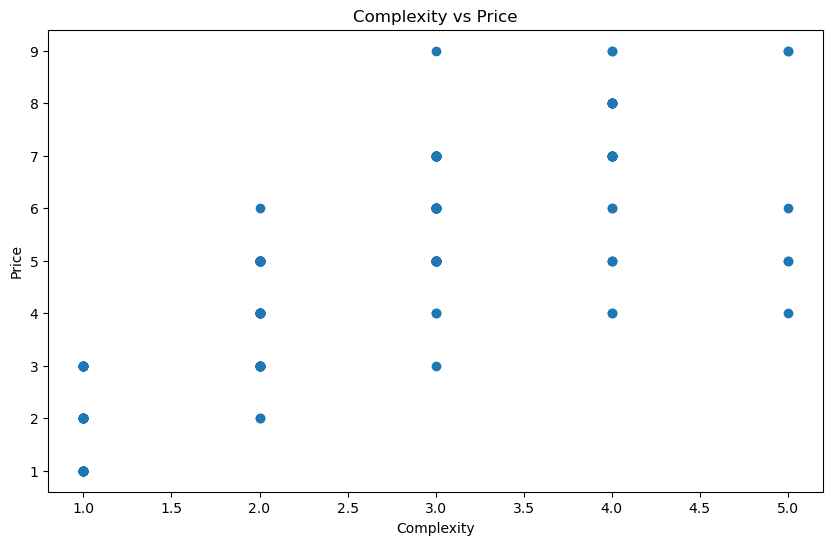

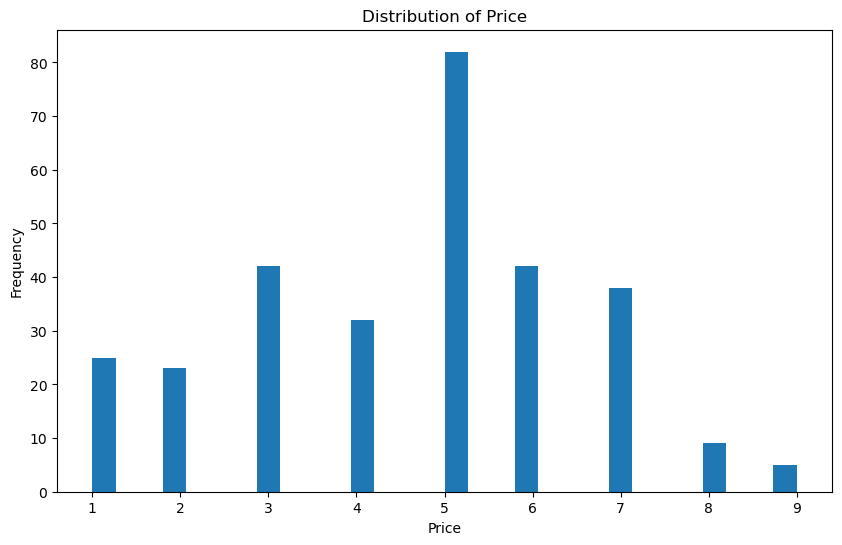

In [245]:
# 1. Data Visualization
plt.figure(figsize=(10, 6))
plt.scatter(df_final['complexity'], df_final['price'])
plt.xlabel('Complexity')
plt.ylabel('Price')
plt.title('Complexity vs Price')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_final['price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

In [248]:
df_final['price_normalized'] = df_final['price'] / df_final['price'].max()
df_final['complexity_normalized'] = df_final['complexity'] / df_final['complexity'].max()

# Function to flatten the vector columns
def flatten_vectors(df):
    industry_array = np.stack(df['industry_vector'].tolist())
    material_array = np.stack(df['material_vector'].tolist())
    
    flattened = np.hstack([
        df[['complexity_normalized']].values,
        industry_array,
        material_array
    ])
    
    columns = ['complexity_normalized'] + \
              [f'industry_{i}' for i in range(industry_array.shape[1])] + \
              [f'material_{i}' for i in range(material_array.shape[1])]
    
    return pd.DataFrame(flattened, index=df.index, columns=columns)

# Flatten the dataframe
df_flattened = flatten_vectors(df_final)

# Split the data
X = df_flattened  # All columns in df_flattened are features
y = df_final['price_normalized']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [249]:
print(X_train.shape, X_test.shape, len(y_train) ,len(y_test))
print(X_train,y_train)

(238, 91) (60, 91) 238 60
     complexity_normalized  industry_0  industry_1  industry_2  industry_3  \
6                      1.0         1.0         0.0         0.0         0.0   
182                    0.4         0.0         0.0         0.0         0.0   
170                    0.2         0.0         0.0         0.0         0.0   
146                    0.6         0.0         0.0         0.0         0.0   
30                     0.8         1.0         0.0         0.0         0.0   
..                     ...         ...         ...         ...         ...   
188                    0.6         0.0         0.0         0.0         0.0   
71                     0.4         0.0         0.0         0.0         0.0   
106                    0.2         0.0         0.0         0.0         0.0   
270                    0.6         0.0         0.0         0.0         0.0   
102                    0.2         0.0         0.0         0.0         0.0   

     industry_4  industry_5  industry

In [252]:
# Train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Mean Squared Error: {mse:.4f}")
print(f"Random Forest R-squared Score: {r2:.4f}")

Random Forest Mean Squared Error: 0.0106
Random Forest R-squared Score: 0.7875


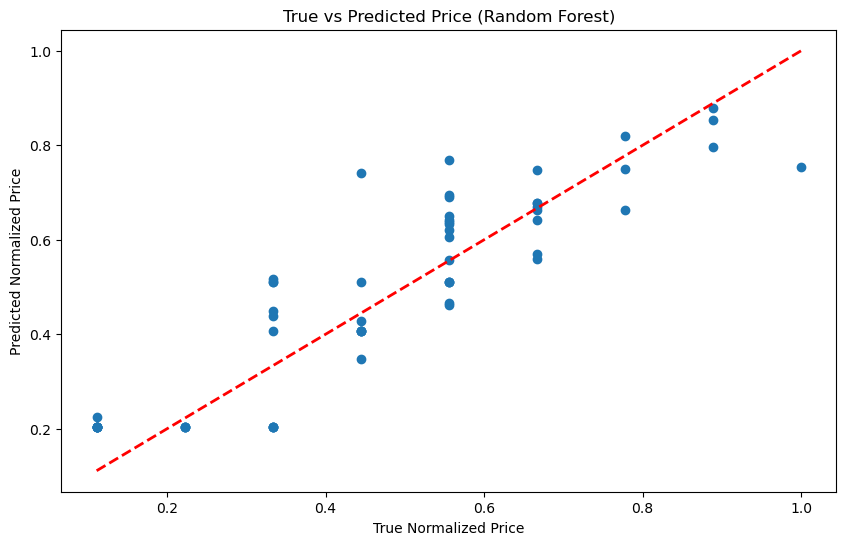

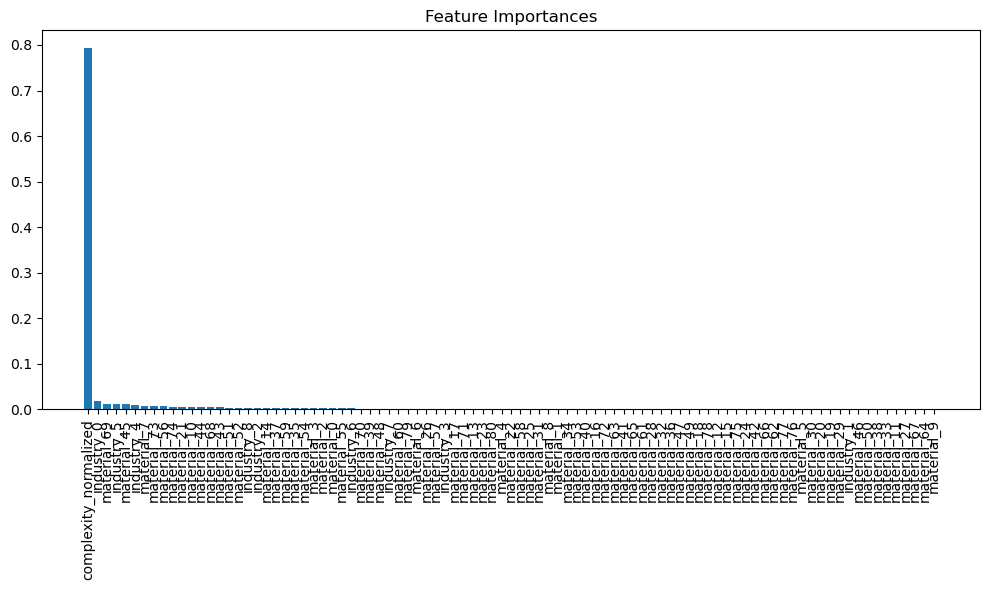

In [253]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Normalized Price')
plt.ylabel('Predicted Normalized Price')
plt.title('True vs Predicted Price (Random Forest)')
plt.show()

# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score, precision_score, classification_report
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier

# # Model Selection and Training
# models = {
#     'Random Forest': RandomForestClassifier(random_state=42),
#     'SVM': SVC(random_state=42),
#     'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
# }

# for name, model in models.items():
#     # Cross-validation
#     cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
#     print(f"{name} CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
#     # Train on full training set
#     model.fit(X_train, y_train)
    
#     # Predict on test set
#     y_pred = model.predict(X_test)
    
#     # Calculate metrics
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred, average='weighted')
    
#     print(f"{name} Test Accuracy: {accuracy:.4f}")
#     print(f"{name} Test Precision: {precision:.4f}")
#     print(classification_report(y_test, y_pred))
#     print("\n")

# # Select the best model based on performance
# best_model = max(models, key=lambda x: accuracy_score(y_test, models[x].predict(X_test)))
# print(f"Best model: {best_model}")

# # Final Visualization
# best_predictions = models[best_model].predict(X_test)

# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, best_predictions)
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
# plt.xlabel('True Normalized Price')
# plt.ylabel('Predicted Normalized Price')
# plt.title(f'True vs Predicted Price ({best_model})')
# plt.show()

# # Histogram of prediction errors
# errors = y_test - best_predictions
# plt.figure(figsize=(10, 6))
# plt.hist(errors, bins=30)
# plt.xlabel('Prediction Error')
# plt.ylabel('Frequency')
# plt.title('Distribution of Prediction Errors')
# plt.show()

# #Additional Analysis: Feature Importance (for Random Forest)
# if best_model == 'Random Forest':
#     importances = models[best_model].feature_importances_
#     indices = np.argsort(importances)[::-1]
    
#     plt.figure(figsize=(10, 6))
#     plt.title("Feature Importances")
#     plt.bar(range(X.shape[1]), importances[indices])
#     plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
#     plt.tight_layout()
#     plt.show()